# This Python script was used to generate the machine learning models and figures used in the paper in the ROBIN RNA binders vs FDA-approved drugs comparison. 

## Software License:

MIT License

Copyright (c) 2022 Yazdani et al. 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## Jupyter notebook within the Anaconda platform was used in writing the following script. Python version 3.8.2 was used as the coding language.
$\;\;\;\;\;\;$



![Python logo](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/300px-Python-logo-notext.svg.png)

$\;\;\;\;\;\;$

In [12]:
# Check Python version
from platform import python_version
print("Python version:")
print(python_version())

Python version:
3.8.2


## macOS Catalina version 10.15.7 was used when running this code on the Anaconda platform. 

## This code was written with the following package versions. Please install the following packages with the mentioned versions for consistency of results.

### pandas --> version 1.4.2

In [13]:
# Check pandas version
import pandas as pd
print("pandas version:")
print(pd.__version__)

pandas version:
1.4.2


### numpy --> version 1.20.3

In [14]:
# Check numpy version
import numpy as np
print("numpy version:")
print(np.__version__)

numpy version:
1.20.3


### matplotlib --> version 3.4.3

In [15]:
# Check matplotlib version
import matplotlib as plt
print("matplotlib version:")
print(plt.__version__)

matplotlib version:
3.4.3


### seaborn --> version 0.11.2

In [16]:
# Check seaborn version
import seaborn as sns
print("seaborn version:")
print(sns.__version__)

seaborn version:
0.11.2


### sklearn --> version 1.0.2

In [17]:
# Check sklearn version
import sklearn
print("sklearn version:")
print(sklearn.__version__)

sklearn version:
1.0.2


### tensorflow --> version 2.3.1

In [18]:
# Check tensorflow version
import tensorflow as tf
print("tensorflow version:")
print(tf.__version__)

tensorflow version:
2.3.1


### keras --> version 2.4.0

In [19]:
# Check keras version
print("keras version:")
print(tf.keras.__version__)

keras version:
2.4.0


### shap --> version 0.37.0

In [20]:
# Check shap version
import shap
print("shap version:")
print(shap.__version__)

shap version:
0.37.0


# Comparison of ROBIN RNA Binders and FDA-approved Drugs

In [21]:
# Import required packages for data processing
import pandas as pd
import numpy as np
import os

# Gets directory of the ROBIN GitHub folder for saving and reading files later
folder_dir = os.getcwd()[:-10]

# Read in the FDA-approved and ROBIN RNA Binding Library into a pandas dataframe
df_FDA_app = pd.read_csv(folder_dir + "/data/Mordred_files/Mordred_FDA_Approved_3D.csv")
df_ROBIN_RNA = pd.read_csv(folder_dir + "/data/Mordred_files/Mordred_ROBIN_RNA_Binder_3D.csv")

"""
The number of compounds in each SDF file may not necessarily match the number of rows of Mordred feature sets
since some compounds failed in Mordred package's feature generation step.
"""

# Delete the name column as it will not be used later
df_FDA_app = df_FDA_app.drop('name', axis=1)
df_ROBIN_RNA = df_ROBIN_RNA.drop('name', axis=1)

# Delete duplicate rows that might still remain in the feature sets
df_FDA_app.drop_duplicates(keep="first", inplace=True)
df_ROBIN_RNA.drop_duplicates(keep="first", inplace=True)

# ________________________________________________

# Report the number of compounds in each library that will be used in machine learning
print("Number of compounds in the FDA-approved drug library:")
print(df_FDA_app.shape[0])
print()
print("Number of compounds in ROBIN RNA binding library:")
print(df_ROBIN_RNA.shape[0])

Number of compounds in the FDA-approved drug library:
2332

Number of compounds in ROBIN RNA binding library:
2003


In [22]:
# Combine the two dataframes and conduct further processing

# Assigning a library name to the two dataframes
df_FDA_app["library"] = "FDA_app"
df_ROBIN_RNA["library"] = "ROBIN_RNA"

# Concat the two dataframes
df_all_1 = pd.concat([df_FDA_app, df_ROBIN_RNA])

# Get the list of all feature columns in the dataset and coerce them to numeric
df_all_1_columns = df_all_1.columns.tolist()[:-1]
df_all_1[df_all_1_columns] = df_all_1[df_all_1_columns].apply(pd.to_numeric, errors='coerce')

# Delete columns that have feature values missing in more than 40% of compounds
df_all_1 = df_all_1.dropna(thresh=df_all_1.shape[0]*0.6, how='all', axis=1)

# Replace missing and infinity values by median of each column
df_all_1.replace([np.inf, -np.inf], np.nan, inplace=True)
df_all_1 = df_all_1.fillna(df_all_1.median(numeric_only=True))

# Reset the index
df_all_1 = df_all_1.reset_index(drop=True)
df_all_1

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,library
0,21.867940,16.331012,0,0,37.431719,2.436602,4.800101,37.431719,1.336847,4.266345,...,77.168493,386.120132,8.393916,2325,42,146.0,171.0,7.388889,6.277778,FDA_app
1,20.769965,17.451224,0,0,34.008889,2.508394,4.961642,34.008889,1.259588,4.218296,...,76.164837,456.000008,10.857143,1808,44,140.0,166.0,9.861111,6.027778,FDA_app
2,31.336126,22.837287,0,2,52.636761,2.513332,4.919404,52.636761,1.315919,4.619682,...,91.481771,540.260531,7.300818,5935,66,212.0,251.0,12.555556,8.805556,FDA_app
3,21.041115,17.918386,0,0,34.697216,2.325186,4.650372,34.697216,1.239186,4.221055,...,62.447305,384.196886,7.248998,2118,38,134.0,149.0,10.388889,6.333333,FDA_app
4,27.662693,20.272208,0,2,46.602898,2.480060,4.960120,46.602898,1.294525,4.503189,...,72.593450,530.172022,8.032909,4488,60,186.0,219.0,11.833333,8.166667,FDA_app
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,27.214806,20.458683,0,1,44.157538,2.489969,4.896200,44.157538,1.261644,4.478267,...,85.335246,463.292834,6.714389,4035,54,182.0,212.0,11.583333,7.722222,ROBIN_RNA
4331,19.396191,15.882175,1,0,31.042890,2.452988,4.905976,31.042890,1.241716,4.147250,...,60.026123,389.960933,12.186279,1462,43,132.0,157.0,9.361111,5.500000,ROBIN_RNA
4332,17.625299,14.116486,0,1,30.014661,2.470248,4.838711,30.014661,1.364303,4.073388,...,75.954218,296.164505,6.731011,1173,32,120.0,143.0,5.277778,4.777778,ROBIN_RNA
4333,35.608879,28.119033,0,2,58.431603,2.383461,4.766923,58.431603,1.217325,4.748780,...,85.211088,685.337612,7.369222,8372,75,230.0,259.0,20.277778,11.000000,ROBIN_RNA


In [24]:
# Data preparation and standardization before the LASSO logisitic regression model

# Import standardization package
from sklearn.preprocessing import StandardScaler

# Prepare the features
X_all_1 = df_all_1.values[:, :-1]
X_all_1 = X_all_1.astype('float64')
X_all_1 = StandardScaler().fit_transform(X_all_1)
print("Shape of the X_all_1 features array:")
print(X_all_1.shape)
print()

# Prepare the labels
y_all_1 = df_all_1.values[:, -1]
y_all_1 = y_all_1.tolist()
y_all_1 = [1 if x == "ROBIN_RNA" else x for x in y_all_1]
y_all_1 = [0 if x == "FDA_app" else x for x in y_all_1]
y_all_1 = np.array(y_all_1)
y_all_1 = y_all_1.astype(float)
print("Shape of the y_all_1 labels array:")
print(y_all_1.shape)

Shape of the X_all_1 features array:
(4335, 1664)

Shape of the y_all_1 labels array:
(4335,)


## Run the LASSO logistic Regression Model on ROBIN RNA Binders vs FDA-approved drugs and evaluate its performance using 10-fold cross-validation

Fold 1:
Train and Test sets shapes:
(3901, 1664)
(3901,)
(434, 1664)
(434,)
Training set AUROC:
0.88
Test set AUROC:
0.85

Fold 2:
Train and Test sets shapes:
(3901, 1664)
(3901,)
(434, 1664)
(434,)
Training set AUROC:
0.88
Test set AUROC:
0.89

Fold 3:
Train and Test sets shapes:
(3901, 1664)
(3901,)
(434, 1664)
(434,)
Training set AUROC:
0.87
Test set AUROC:
0.9

Fold 4:
Train and Test sets shapes:
(3901, 1664)
(3901,)
(434, 1664)
(434,)
Training set AUROC:
0.88
Test set AUROC:
0.89

Fold 5:
Train and Test sets shapes:
(3901, 1664)
(3901,)
(434, 1664)
(434,)
Training set AUROC:
0.88
Test set AUROC:
0.84

Fold 6:
Train and Test sets shapes:
(3902, 1664)
(3902,)
(433, 1664)
(433,)
Training set AUROC:
0.88
Test set AUROC:
0.85

Fold 7:
Train and Test sets shapes:
(3902, 1664)
(3902,)
(433, 1664)
(433,)
Training set AUROC:
0.88
Test set AUROC:
0.86

Fold 8:
Train and Test sets shapes:
(3902, 1664)
(3902,)
(433, 1664)
(433,)
Training set AUROC:
0.88
Test set AUROC:
0.88

Fold 9:
Train and

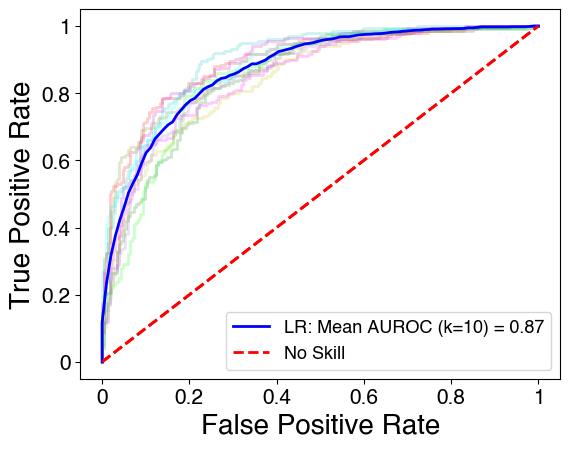

In [25]:
# Import the necessary packages
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Set matplotlib settings to default
plt.style.use('default')

# Change font to Helvetica
plt.rc('font', family='Helvetica')

# Set random seed for the models for consistency of results
np.random.seed(5)
RANDOM_SEED = 5

# Define the logistic regression classifier
clf = LogisticRegression(C=0.009, penalty='l1', solver='liblinear',
                         max_iter=100, random_state=RANDOM_SEED, class_weight='balanced')

# Do 10-fold cross-validation
n_splits = 10
cv = StratifiedKFold(n_splits, random_state=RANDOM_SEED, shuffle=True)

# Define the colors to be used for the 10 folds as they are drawn on the ROC curve
colors = ["g", "r", "c", "m", "y", "lime", "mediumpurple", "olive",
          "aqua", "magenta", "skyblue", "yellowgreen", "gold", "tan", "silver"]


# Run the cross-validation forloop and draw the auc curve for the LASSO logistic regression model

# Define the counters and empty list to be used in the forloop
num = 0
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Forloop for each train-test split
for train, test in cv.split(X_all_1, y_all_1):
    # Fit the model on training set features and labels and predict probabilities for the test features
    prediction = clf.fit(X_all_1[train], y_all_1[train]).predict_proba(X_all_1[test])
    # Calculate fpr and tpr
    fpr, tpr, t = roc_curve(y_all_1[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    # Print fold number and shape of the train and test sets
    print("Fold " + str(num+1) + ":")
    print("Train and Test sets shapes:")
    print(X_all_1[train].shape)
    print(y_all_1[train].shape)
    print(X_all_1[test].shape)
    print(y_all_1[test].shape)
    # Caluclate AUROC score
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=colors[num], lw=2, alpha=0.2)
    # Update counter
    num += 1
    # Predict probabilities for train and test set features ... this is used to monitor each fold and avoid overfitting
    y_pred_train = clf.predict_proba(X_all_1[train])[:, 1]
    y_pred_test = clf.predict_proba(X_all_1[test])[:, 1]
    # Print AUROC scores for train and test sets
    auc_train = roc_auc_score(y_all_1[train], y_pred_train)
    print("Training set AUROC:")
    print(round(auc_train, 2))
    auc_test = roc_auc_score(y_all_1[test], y_pred_test)
    print("Test set AUROC:")
    print(round(auc_test, 2))
    print()

# Draw the random chance line on the ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red')

# Calculate mean auc
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
mean_auc = round(mean_auc, 2)
mean_fpr = mean_fpr.tolist()
mean_tpr = mean_tpr.tolist()
mean_fpr = [0.0] + mean_fpr
mean_tpr = [0.0] + mean_tpr

# Plot the average roc curve
plt.plot(mean_fpr, mean_tpr, color="b", label='LR: ' + 'Mean AUROC (k=10) = %.2f' % (mean_auc), lw=2, alpha=1)

# Label the x and y axis
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

# Set xaxis and yaxis ticks
tick_list = [0, 0.2, 0.4, 0.6, 0.8, 1]
plt.xticks(tick_list, tick_list, fontsize=15)
plt.yticks(tick_list, tick_list, fontsize=15)

# Draw the random chance line on the ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', label="No Skill")

# Set figure legend
plt.legend(loc="lower right", fontsize=13)

# Remove the gridlines
plt.grid(visible=False)

# Set aspect ration of plot
axes = plt.gca()
axes.set_aspect(0.77)

# Show the ROC curve
plt.savefig(folder_dir + '/figures/ROC_ROBIN_RNA_vs_FDA.png', dpi=600, bbox_inches="tight")

# Show the ROC curve
plt.show()

In [26]:
# Calculate highest and lowest coefficients of LASSO logistic regression

# Train the logistic regression model on the entire dataset this time
clf = LogisticRegression(C=0.009, penalty='l1', solver='liblinear',
                         max_iter=100, random_state=RANDOM_SEED,
                         class_weight='balanced').fit(X_all_1, y_all_1)

# Get the LR coefficients and sort them
LR_coeffs = clf.coef_[0].tolist()
sorted_LR_coeffs = sorted(LR_coeffs, reverse=True)

# Calculate the number of positive and negative logistic regression coefficients
Num_positive_LR_coeffs = 0
for item in LR_coeffs:
    if item > 0:
        Num_positive_LR_coeffs += 1
Num_negative_LR_coeffs = 0
for item in LR_coeffs:
    if item < 0:
        Num_negative_LR_coeffs += 1

# Get the positive and negative coefficients as lists
sorted_LR_coeffs_top = sorted_LR_coeffs[0:Num_positive_LR_coeffs]
sorted_LR_coeffs_buttom = sorted_LR_coeffs[-1*Num_negative_LR_coeffs:][::-1]

# Get features of the df_all array
features = df_all_1.columns.tolist()[0:-1]

# Get the names of features with the highest positive coefficients in the LR model
top_features = []
for j in range(len(sorted_LR_coeffs_top)):
    for i in range(len(LR_coeffs)):
        if sorted_LR_coeffs_top[j] == LR_coeffs[i]:
            top_features.append((features[i], round(LR_coeffs[i], 3)))
print("Positive coefficients and their features:")
print(top_features)
print()

# Get the names of features with the lowest negative coefficients in the LR model
buttom_features = []
for j in range(len(sorted_LR_coeffs_buttom)):
    for i in range(len(LR_coeffs)):
        if sorted_LR_coeffs_buttom[j] == LR_coeffs[i]:
            buttom_features.append((features[i], round(LR_coeffs[i], 3)))
print("Negative coefficients and their features:")
print(buttom_features)


# Report the number of non-zero features in the LR model
count = 0
for item in sorted_LR_coeffs:
    if item > 0 or item < 0:
        count += 1
print()
print("Number of nonzero coefficients:")
print(count)

# Save the non-zero features and their coefficients in the supplemental folder
df_LASSO_nonzero_features = pd.DataFrame(top_features+buttom_features, columns=['Feature', 'LR Coefficient'])
df_LASSO_nonzero_features.to_csv(folder_dir +
                                 '/LASSO_coefficients/LASSO_all_nonzero_coefficients_FDA_vs_ROBIN_RNA.csv',
                                 index=False)

Positive coefficients and their features:
[('GhoseFilter', 0.295), ('SaasC', 0.289), ('AMID_N', 0.196), ('fMF', 0.193), ('SssNH2', 0.179), ('Lipinski', 0.162), ('GATS1c', 0.155), ('SsNH3', 0.137), ('MINdO', 0.127), ('n5aHRing', 0.113), ('n5aRing', 0.085), ('SssNH', 0.081), ('AATS8p', 0.075), ('MATS2d', 0.059), ('n4aRing', 0.053), ('BCUTZ-1h', 0.048), ('SlogP_VSA10', 0.026), ('NsssdAs', 0.022), ('SsBr', 0.02), ('nBr', 0.02), ('PetitjeanIndex', 0.004), ('BIC3', 0.001), ('NsBr', 0.0)]

Negative coefficients and their features:
[('nG12FARing', -0.163), ('AMID_O', -0.123), ('Mor22m', -0.083), ('ETA_shape_p', -0.081), ('nAcid', -0.079), ('NsssCH', -0.069), ('NdO', -0.068), ('JGI2', -0.027), ('n8FARing', -0.023), ('Mor22v', -0.021), ('nO', -0.021), ('NdssS', -0.017), ('Mor26p', -0.011), ('n4AHRing', -0.01), ('NsCH3', -0.009), ('NsssNH', -0.007), ('Mor26v', -0.004), ('ATSC2i', -0.001)]

Number of nonzero coefficients:
41


In [27]:
# Save the top 5 positive and top 5 negative features in a CSV to be shown in figure

lasso_features_figure = top_features[0:5] + buttom_features[0:5]
df_LASSO_figure_nonzero_features = pd.DataFrame(lasso_features_figure, columns=['Feature', 'LR Coefficient'])
df_LASSO_figure_nonzero_features

,Feature,LR Coefficient
0,GhoseFilter,0.295
1,SaasC,0.289
2,AMID_N,0.196
3,fMF,0.193
4,SssNH2,0.179
5,nG12FARing,-0.163
6,AMID_O,-0.123
7,Mor22m,-0.083
8,ETA_shape_p,-0.081
9,nAcid,-0.079


In [28]:
# Split the top 10 features into two tables of features with positive and negative coefficients

# Import the math package to calculate the odds ratio
import math

# Create the positive features table
lasso_positive_features_figure = top_features[0:5]
df_LASSO_positive_features_figure = pd.DataFrame(lasso_positive_features_figure,
                                                 columns=['Feature', 'LR Coefficient'])
df_LASSO_positive_features_figure["Odds Ratio"] = np.exp(df_LASSO_positive_features_figure["LR Coefficient"]).round(3)
df_LASSO_positive_features_figure.to_csv(folder_dir +
                                         '/LASSO_coefficients/LASSO_ROBIN_RNA_vs_FDA_5_most_positive_coefficients.csv',
                                         index=False)
print("Top 5 most positive features table:")
print(df_LASSO_positive_features_figure)
print()

# Create the negative features table
lasso_negative_features_figure = buttom_features[0:5]
df_LASSO_negative_features_figure = pd.DataFrame(lasso_negative_features_figure,
                                                 columns=['Feature', 'LR Coefficient'])

df_LASSO_negative_features_figure["Odds Ratio"] = np.exp(df_LASSO_negative_features_figure["LR Coefficient"]).round(3)
df_LASSO_negative_features_figure.to_csv(folder_dir +
                                         '/LASSO_coefficients/LASSO_ROBIN_RNA_vs_FDA_5_most_negative_coefficients.csv',
                                         index=False)
print("Top 5 most negative features table:")
print(df_LASSO_negative_features_figure)

Top 5 most positive features table:
       Feature  LR Coefficient  Odds Ratio
0  GhoseFilter           0.295       1.343
1        SaasC           0.289       1.335
2       AMID_N           0.196       1.217
3          fMF           0.193       1.213
4       SssNH2           0.179       1.196

Top 5 most negative features table:
       Feature  LR Coefficient  Odds Ratio
0   nG12FARing          -0.163       0.850
1       AMID_O          -0.123       0.884
2       Mor22m          -0.083       0.920
3  ETA_shape_p          -0.081       0.922
4        nAcid          -0.079       0.924


# Show distribution of the five most positive and most negative features for ROBIN and FDA-approved sets

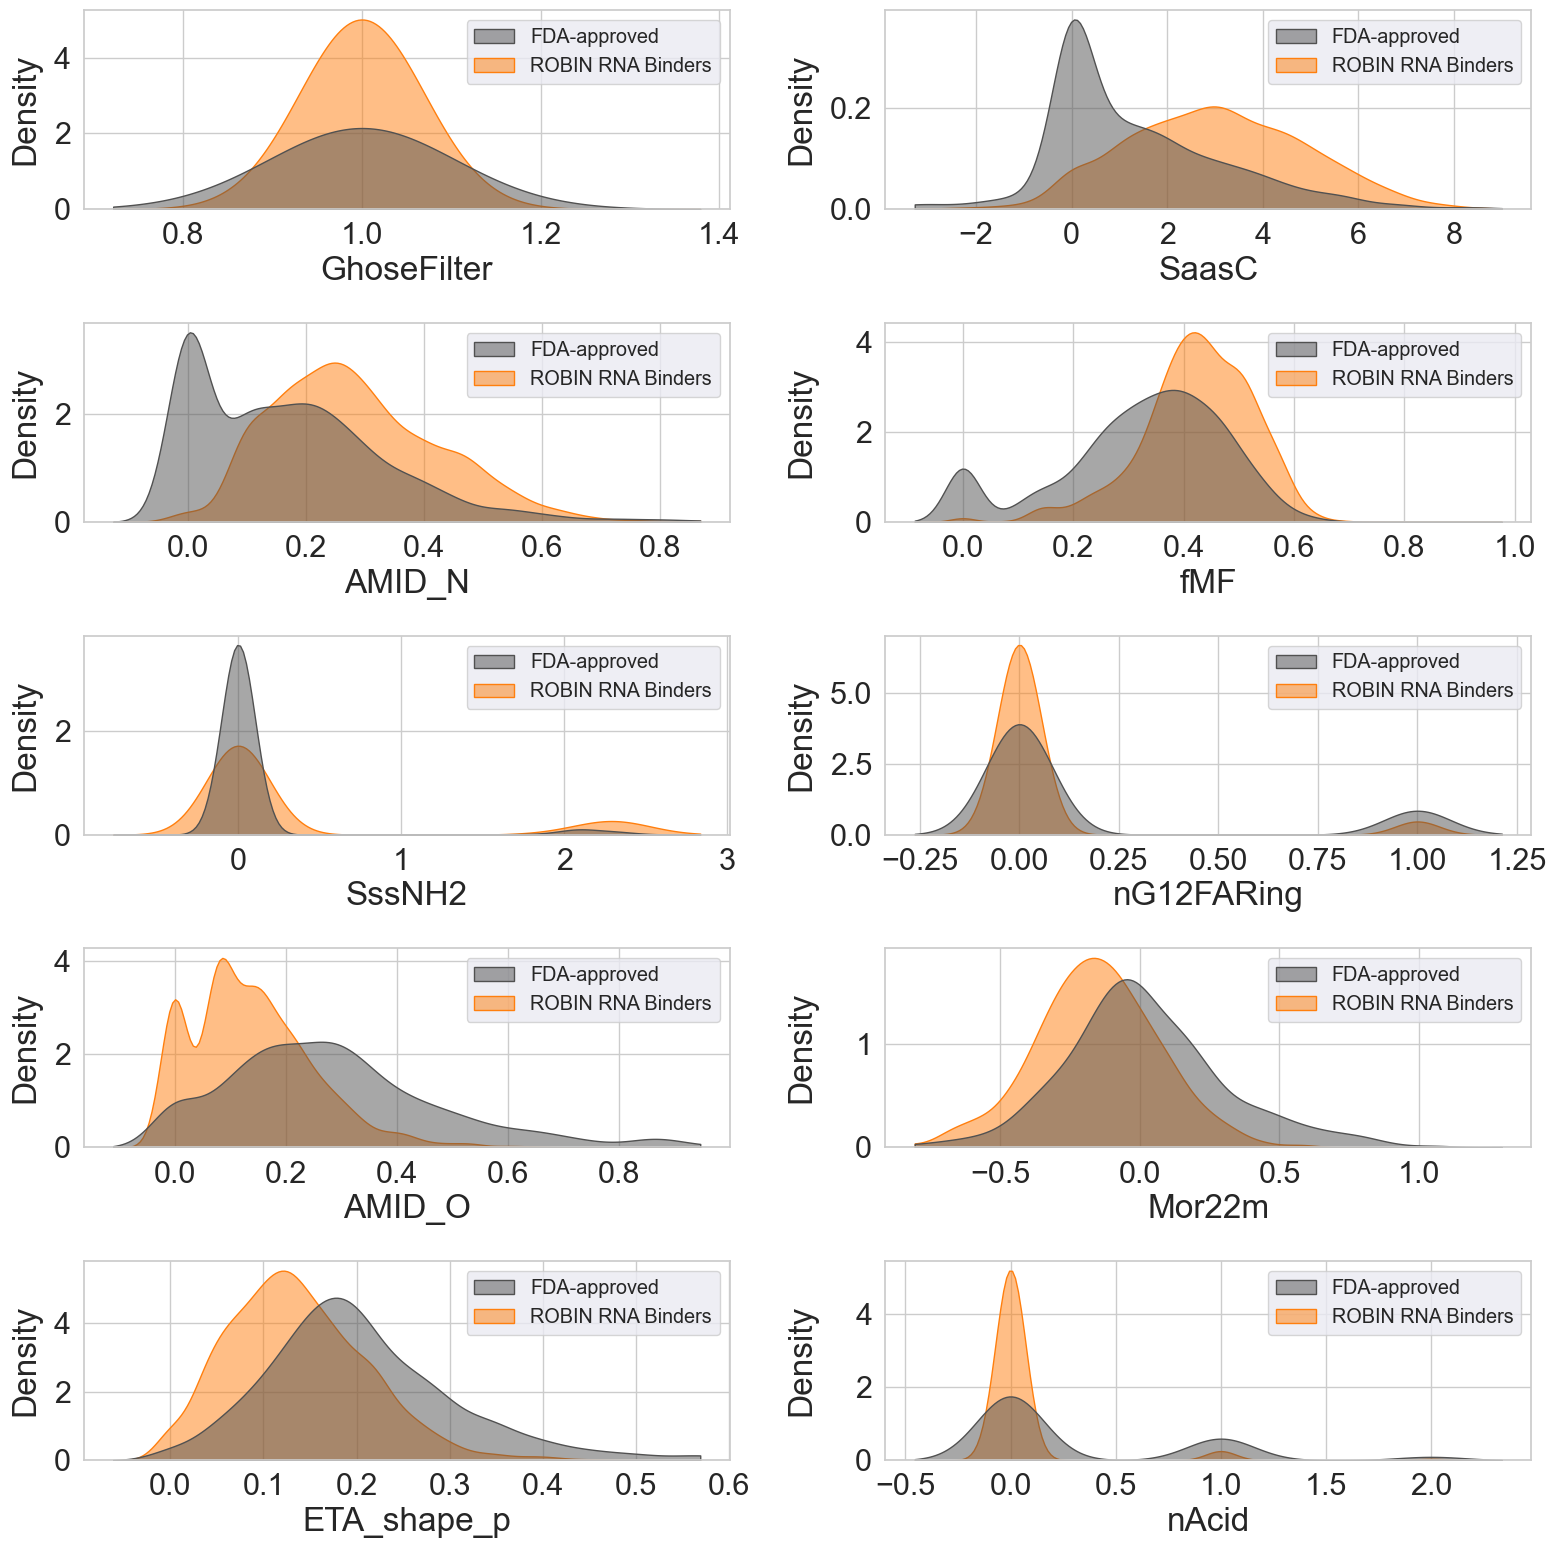

In [36]:
# Import the required packages
import statistics
import seaborn as sns

# Set global font size
sns.set(font_scale=2)

# Change style of seaborn plot to whitegrid
sns.set_style("whitegrid")


# Define the 10 features we want to plot
LASSO_features = df_LASSO_figure_nonzero_features["Feature"].tolist()
X_axis_labels = LASSO_features


# Define the subplot dimensions
fig, axes = plt.subplots(5, 2, figsize=(16, 16))


# Location of each subplot in the larger plot
axes_list = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1],
             [3, 0], [3, 1], [4, 0], [4, 1]]

# This counter will be used for moving on to the next plot
i = 0

# Uppper and lower limit for xaxis of each subplot
Upper_lower_limit_list = [[0.5, 1], [3.3, 3], [2.9, 3.5], [5, 3.7], [1.3, 5],
                          [1.3, 2.9], [2.2, 4], [2.8, 4.5], [2.6, 3.9], [1.6, 3]]

df_all_LASSO_distributions = df_all_1.copy()

df_all_LASSO_distributions["library"] = df_all_LASSO_distributions["library"].replace({'ROBIN_RNA': "ROBIN RNA Binders"})
df_all_LASSO_distributions["library"] = df_all_LASSO_distributions["library"].replace({'FDA_app': "FDA-approved"})

# Forloop for generation of each subplot
for feature in LASSO_features:
    # Get the values of each feature for both sets
    df_feature_RNA_binding = df_all_1.loc[df_all_1['library'] == "ROBIN_RNA"][feature].tolist()
    df_feature_FDA_approved = df_all_1.loc[df_all_1['library'] == "FDA_app"][feature].tolist()
    # Configure upper and lower limits of the xaxis for each plot
    upper_limit = statistics.mean(df_feature_RNA_binding) - (Upper_lower_limit_list[i][0]*statistics.stdev(df_feature_RNA_binding))
    lower_limit = statistics.mean(df_feature_RNA_binding) + (Upper_lower_limit_list[i][1]*statistics.stdev(df_feature_FDA_approved))
    # KDE plot with each library shown as a different color
    sns.set(font_scale=1.3)
    fig = sns.kdeplot(ax=axes[axes_list[i][0], axes_list[i][1]], data=df_all_LASSO_distributions,
                      x=feature, hue="library", fill=True, common_norm=False,
                      alpha=.5, clip=[lower_limit, upper_limit],
                      palette=['#515151', '#ff7f0e'])

    # Remove figure legend title
    fig.legend_.set_title(None)
 
    # Set labels and fix font
    sns.set(font_scale=2)
    fig.set(xlabel=X_axis_labels[i], ylabel='Density ')
    # Update the plot counter

    # Adjust the distance from axis labels to axis
    if i == 0:
        fig.set_ylabel('Density', labelpad=9)
    if i == 1:
        fig.set_ylabel('Density', labelpad=9)
    if i == 2:
        fig.set_ylabel('Density', labelpad=9)
    if i == 3:
        fig.set_ylabel('Density', labelpad=27)
    if i == 4:
        fig.set_ylabel('Density', labelpad=9)
    if i == 5:
        fig.set_ylabel('Density', labelpad=9)
    if i == 6:
        fig.set_ylabel('Density', labelpad=9)
    if i == 7:
        fig.set_ylabel('Density', labelpad=27)
    if i == 8:
        fig.set_ylabel('Density', labelpad=9)
    if i == 9:
        fig.set_ylabel('Density', labelpad=27)

    # Update the plot counter
    i += 1

# Adjust the spacing around the subplot
left = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2  # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
plt.tight_layout()

# Save the plot
plt.savefig(folder_dir + "/figures/LASSO_frequency_distribution_ROBIN_RNA_vs_FDA.png", dpi=600)

# Show plot
plt.show()

# Show distribution of 6 medicinal chemistry features for ROBIN RNA Binders , the FDA-approved set, and SMM non-RNA Binders

In [37]:
# Read in the ROBIN RNA non-binders and add it to df_all for visualization of medicinal chemistry features in the next cell

df_ROBIN_Non_binder = pd.read_csv(folder_dir + "/data/Mordred_files/Mordred_SMM_RNA_Non_Binder_3D.csv")
features_to_keep = df_all_1.columns.tolist()[:-1]
df_ROBIN_Non_binder = df_ROBIN_Non_binder[features_to_keep]
df_ROBIN_Non_binder["library"] = "ROBIN_Non_RNA_Binders"
df_all_frequency_plot = pd.concat([df_all_1, df_ROBIN_Non_binder],  ignore_index=True)
df_all_frequency_plot

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,library
0,21.867940,16.331012,0,0,37.431719,2.436602,4.800101,37.431719,1.336847,4.266345,...,77.168493,386.120132,8.393916,2325,42,146.0,171.0,7.388889,6.277778,FDA_app
1,20.769965,17.451224,0,0,34.008889,2.508394,4.961642,34.008889,1.259588,4.218296,...,76.164837,456.000008,10.857143,1808,44,140.0,166.0,9.861111,6.027778,FDA_app
2,31.336126,22.837287,0,2,52.636761,2.513332,4.919404,52.636761,1.315919,4.619682,...,91.481771,540.260531,7.300818,5935,66,212.0,251.0,12.555556,8.805556,FDA_app
3,21.041115,17.918386,0,0,34.697216,2.325186,4.650372,34.697216,1.239186,4.221055,...,62.447305,384.196886,7.248998,2118,38,134.0,149.0,10.388889,6.333333,FDA_app
4,27.662693,20.272208,0,2,46.602898,2.480060,4.960120,46.602898,1.294525,4.503189,...,72.593450,530.172022,8.032909,4488,60,186.0,219.0,11.833333,8.166667,FDA_app
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26829,31.933843,23.251717,0,1,52.464934,2.520656,4.959661,52.464934,1.311623,4.635260,...,93.021578,539.289640,7.003762,5696,65,218.0,260.0,11.055556,8.638889,ROBIN_Non_RNA_Binders
26830,15.848427,13.614867,0,0,25.371112,2.531660,4.968119,25.371112,1.268556,3.946439,...,68.578776,287.072848,8.699177,748,34,110.0,133.0,6.979167,4.250000,ROBIN_Non_RNA_Binders
26831,22.793826,17.631491,0,1,37.853116,2.394914,4.784403,37.853116,1.305280,4.300505,...,77.543239,394.209833,7.437921,2369,43,152.0,177.0,8.250000,6.361111,ROBIN_Non_RNA_Binders
26832,30.987147,22.196194,0,2,50.023113,2.421718,4.843044,50.023113,1.282644,4.598738,...,89.725230,533.227121,7.958614,5831,61,210.0,245.0,12.395833,8.277778,ROBIN_Non_RNA_Binders


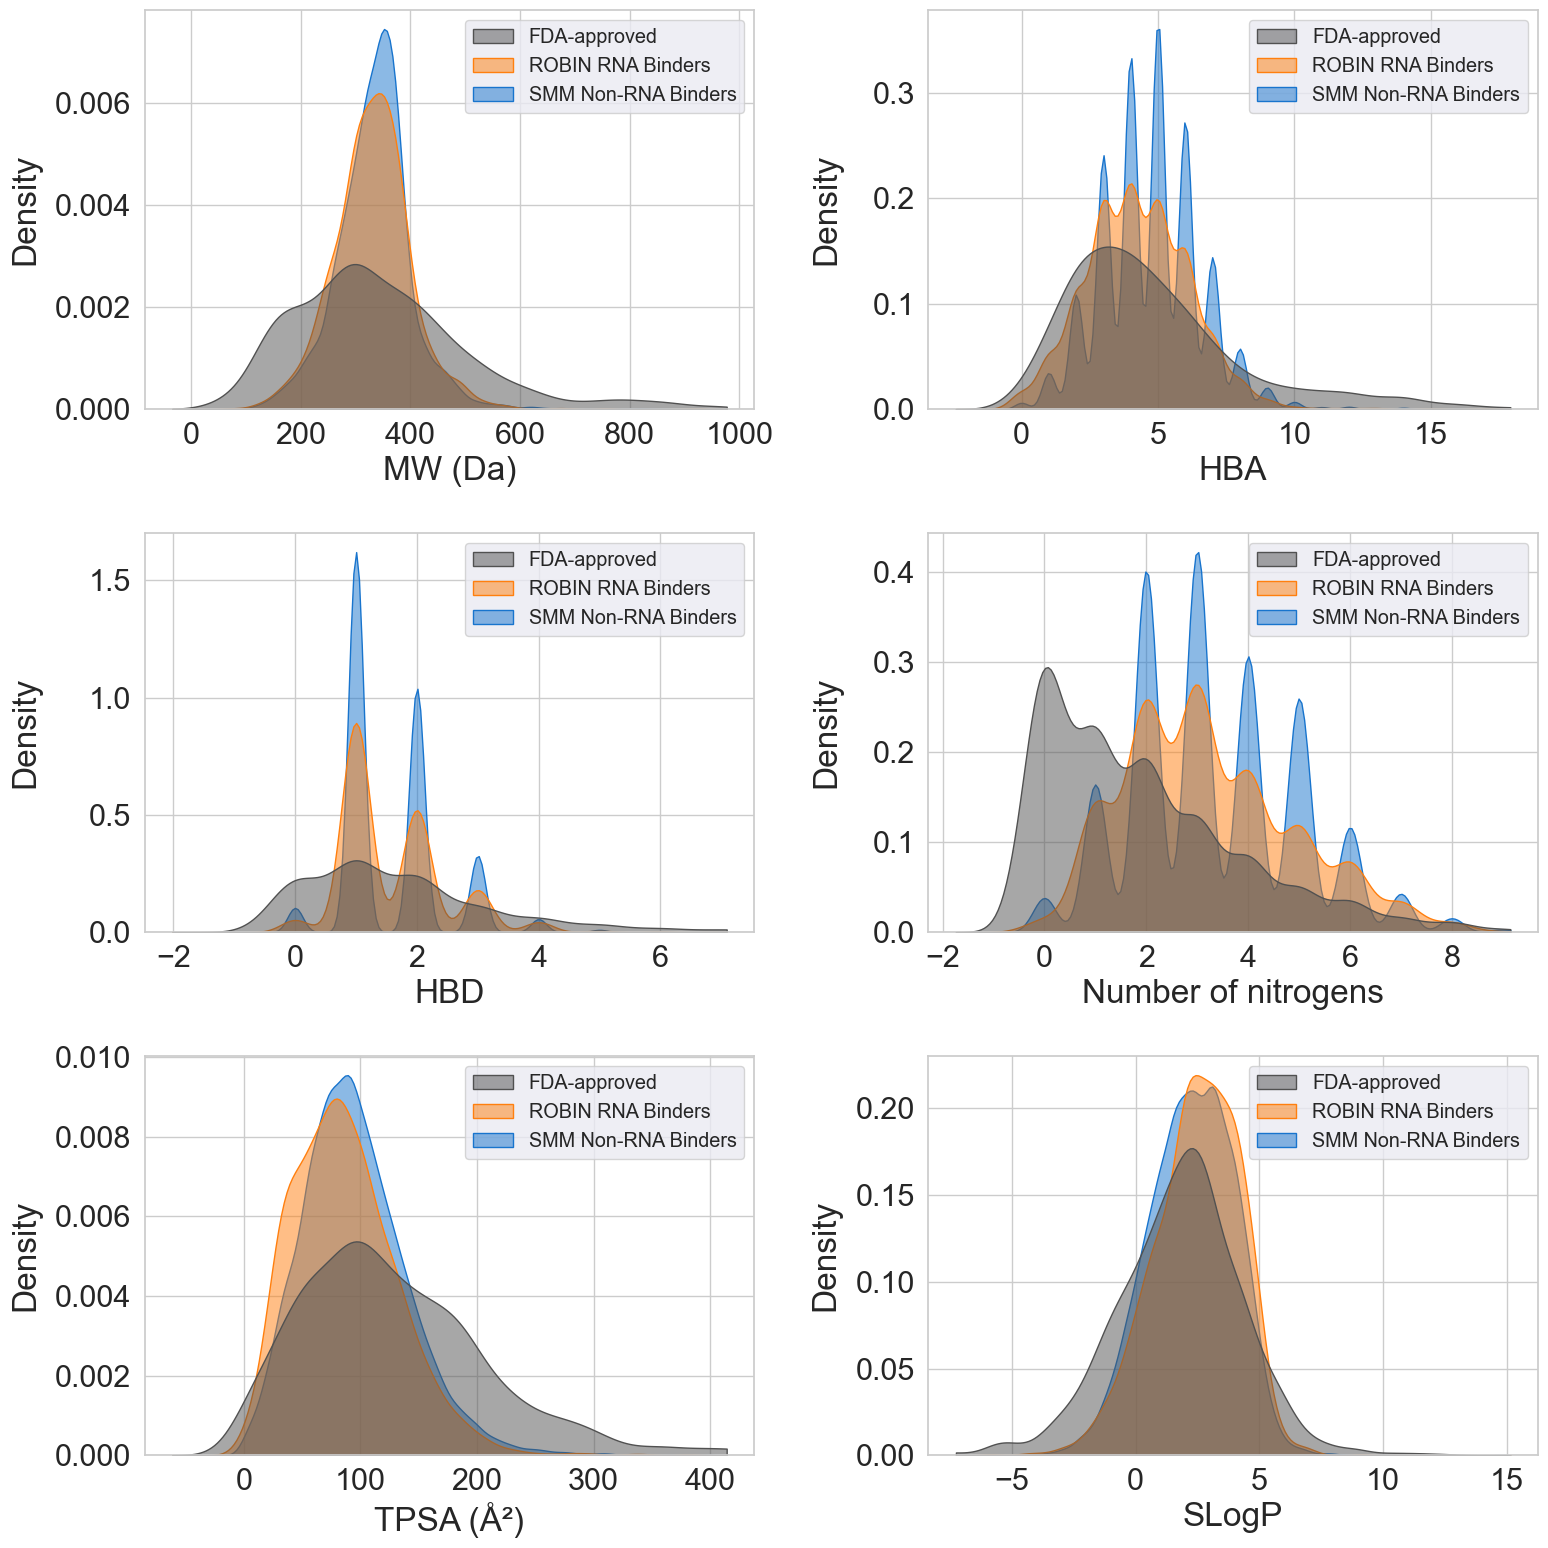

In [38]:
# Plot 6 medicinal chemistry features for ROBIN and FDA-approved drugs

# Import the required packages
import statistics
import seaborn as sns

# Change style of seaborn plot to whitegrid
sns.set_style("whitegrid")


# Define the 6 features we want to plot
Lipinki_features = ["MW", "nHBAcc", "nHBDon", "nN", "TPSA", "SLogP"]
X_axis_labels = ["MW (Da)", "HBA", "HBD", "Number of nitrogens", "TPSA (Å²)", "SLogP"]


# Define the subplot dimensions
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

# Location of each subplot in the larger plot
axes_list = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1]]

# This counter will be used for moving on to the next plot
i = 0

# Uppper and lower limit for xaxis of each subplot
Upper_lower_limit_list = [[4.9, 4], [3.5, 4], [3.4, 2.7], [2.9, 3], [3.1, 3.8], [5.4, 4.8]]


df_all_frequency_plot["library"] = df_all_frequency_plot["library"].replace({'ROBIN_RNA': "ROBIN RNA Binders"})
df_all_frequency_plot["library"] = df_all_frequency_plot["library"].replace({'FDA_app': "FDA-approved"})
df_all_frequency_plot["library"] = df_all_frequency_plot["library"].replace({'ROBIN_Non_RNA_Binders': "SMM Non-RNA Binders"})


# Forloop for generation of each subplot
for feature in Lipinki_features:
    # Get the values of each feature for both sets
    df_feature_RNA_binding = df_all_1.loc[df_all_1['library'] == "ROBIN_RNA"][feature].tolist()
    df_feature_FDA_approved = df_all_1.loc[df_all_1['library'] == "FDA_app"][feature].tolist()
    # Configure upper and lower limits of the xaxis for each plot
    upper_limit = statistics.mean(df_feature_RNA_binding) - (Upper_lower_limit_list[i][0]*statistics.stdev(df_feature_RNA_binding))
    lower_limit = statistics.mean(df_feature_RNA_binding) + (Upper_lower_limit_list[i][1]*statistics.stdev(df_feature_FDA_approved))
    # KDE plot with each library shown as a different color
    sns.set(font_scale=1.3)
    fig = sns.kdeplot(ax=axes[axes_list[i][0], axes_list[i][1]], data=df_all_frequency_plot, x=feature,
                      hue="library", fill=True, common_norm=False, alpha=.5, clip=[lower_limit, upper_limit],
                      palette=['#515151', '#ff7f0e', '#1874CD']
                     )
    # Remove figure legend title
    fig.legend_.set_title(None)

    # Set labels and fix font
    sns.set(font_scale=2)

    # Set x-axis labels
    fig.set_xlabel(X_axis_labels[i])

    # Set y-axis labels and fix spacing
    if i == 1:
        fig.set_ylabel('Density', labelpad=22)
    elif i == 2:
        fig.set_ylabel('Density', labelpad=34.2)
    elif i == 3:
        fig.set_ylabel('Density', labelpad=22)
    else:
        fig.set_ylabel('Density', labelpad=10)

    # Update the plot counter
    i += 1

# Adjust the spacing around the subplot
left = 0.125   # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
plt.tight_layout()

# Save the plot
plt.savefig(folder_dir + '/figures/Lipinski_KDE_distribution_ROBIN_RNA_vs_FDA.png', dpi=600)

# Show plot
plt.show()